In [1]:
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Flatten, Dense,Dropout, Activation
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import cv2


Using TensorFlow backend.
/home/server1/anaconda3/envs/ksa2020/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/server1/anaconda3/envs/ksa2020/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/server1/anaconda3/envs/ksa2020/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/server1/

In [3]:
pre_model = Sequential()
pre_model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
pre_model.add(Convolution2D(64, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(64, (3, 3), activation='relu'))
pre_model.add(MaxPooling2D((2,2), strides=(2,2)))
 
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(128, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(128, (3, 3), activation='relu'))
pre_model.add(MaxPooling2D((2,2), strides=(2,2)))
 
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(256, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(256, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(256, (3, 3), activation='relu'))
pre_model.add(MaxPooling2D((2,2), strides=(2,2)))
 
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(512, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(512, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(512, (3, 3), activation='relu'))
pre_model.add(MaxPooling2D((2,2), strides=(2,2)))
 
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(512, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(512, (3, 3), activation='relu'))
pre_model.add(ZeroPadding2D((1,1)))
pre_model.add(Convolution2D(512, (3, 3), activation='relu'))
pre_model.add(MaxPooling2D((2,2), strides=(2,2)))
 
pre_model.add(Convolution2D(4096, (7, 7), activation='relu'))
pre_model.add(Dropout(rate=0.5))
pre_model.add(Convolution2D(4096, (1, 1), activation='relu'))
pre_model.add(Dropout(rate=0.5))
pre_model.add(Convolution2D(2622, (1, 1)))


In [4]:
from keras.models import model_from_json
pre_model.load_weights('vgg_face_weights.h5')
pre_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_14 (ZeroPaddi (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_15 (ZeroPaddi (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_16 (ZeroPaddi (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 112, 112, 128)     73856     
__________

In [7]:
pre_model = Model(pre_model.layers[0].input, pre_model.layers[-6].output)

pre_model.trainable = False

model = models.Sequential()
model.add(pre_model)
model.add(layers.Conv2D(512, (7, 7), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(1024, (1, 1), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(512, (1, 1), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

print("훈련되는 가중치 수 : ", len(model.trainable_weights))

model.summary()

훈련되는 가중치 수 :  10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_3 (Model)              (None, 28, 28, 512)       5275456   
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 22, 22, 512)       12845568  
_________________________________________________________________
dropout_9 (Dropout)          (None, 22, 22, 512)       0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 22, 22, 1024)      525312    
_________________________________________________________________
dropout_10 (Dropout)         (None, 22, 22, 1024)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 22, 22, 512)       524800    
_________________________________________________________________
flatten_3 (Flatten)          (None, 247808)            0   

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
    )

validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (224,224),
    batch_size = 2,
    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
    'validation',
    target_size = (224,224),
    batch_size = 2,
    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
    'test',
    target_size = (224,224),
    batch_size = 2,
    class_mode = 'binary')

Found 208 images belonging to 2 classes.
Found 52 images belonging to 2 classes.
Found 53 images belonging to 2 classes.


In [11]:
from keras import optimizers

model.compile(loss= 'binary_crossentropy',
            optimizer = optimizers.RMSprop(lr = 1e-5),
            metrics=['accuracy'])

In [13]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100 // 2,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 30
)

Epoch 1/50
50/50 [==============================] - 50s 1s/step - loss: 1.2236 - acc: 0.5500 - val_loss: 0.6562 - val_acc: 0.5833
Epoch 2/50
50/50 [==============================] - 50s 1s/step - loss: 0.9877 - acc: 0.5400 - val_loss: 0.6722 - val_acc: 0.5667
Epoch 3/50
50/50 [==============================] - 50s 1s/step - loss: 1.0452 - acc: 0.5100 - val_loss: 0.8273 - val_acc: 0.5167
Epoch 4/50
50/50 [==============================] - 50s 1s/step - loss: 0.8375 - acc: 0.6000 - val_loss: 0.6520 - val_acc: 0.5500
Epoch 5/50
50/50 [==============================] - 50s 1s/step - loss: 0.8353 - acc: 0.5700 - val_loss: 0.6416 - val_acc: 0.5833
Epoch 6/50
50/50 [==============================] - 50s 1s/step - loss: 0.8012 - acc: 0.6300 - val_loss: 0.7150 - val_acc: 0.5167
Epoch 7/50
50/50 [==============================] - 50s 1s/step - loss: 0.8107 - acc: 0.6200 - val_loss: 0.6198 - val_acc: 0.6833
Epoch 8/50
50/50 [==============================] - 50s 1s/step - loss: 0.9066 - acc: 0.61

loss :  0.44681817329651635
acc :  0.8201999999999998

val_loss :  0.7901152076239741
val_acc :  0.6693333333333333


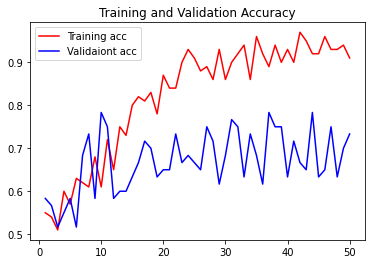

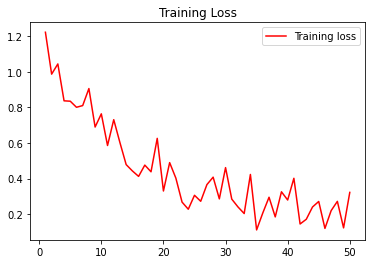

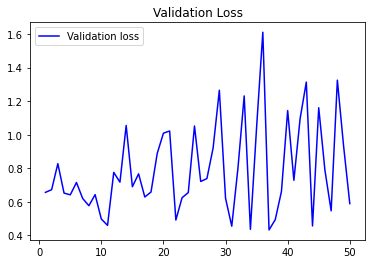

In [19]:
import matplotlib.pyplot as plt
import numpy as np

history_data = history.history
history_data.keys()

loss = history_data['loss']
acc = history_data['acc']
val_loss = history_data['val_loss']
val_acc = history_data['val_acc']

print("loss : ", np.mean(loss))
print("acc : ", np.mean(acc))
print()
print("val_loss : ", np.mean(val_loss))
print("val_acc : ", np.mean(val_acc))



epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validaiont acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.title('Training Loss')
plt.legend()
plt.show()

plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Validation Loss')
plt.legend()
plt.show()

In [21]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print("test_acc : ", test_acc)
print("test_loss : ",test_loss)

test_acc :  0.8163265306122449
test_loss :  0.4178875225201298


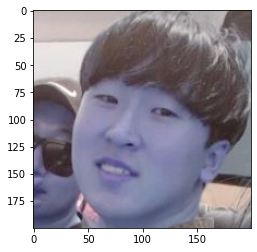

[[MyFace -> 88.60%]]


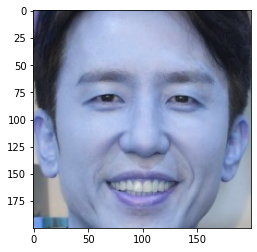

[[MyFace -> 1.34%]]


In [24]:
import numpy as np

img = cv2.imread('face.jpg', cv2.IMREAD_COLOR)
img3 = cv2.imread('notme.jpg', cv2.IMREAD_COLOR)

img2 = img
img4 = img3

img = cv2.resize(img, dsize=(224,224), interpolation = cv2.INTER_AREA)
img = img.astype('float32')/255
img = img.reshape((1,224,224,3))
img3 = cv2.resize(img3, dsize=(224,224), interpolation = cv2.INTER_AREA)
img3 = img3.astype('float32')/255
img3 = img3.reshape((1,224,224,3))



predict_img = model.predict(img, steps =1)
predict_img2 = model.predict(img3, steps=1)

np.set_printoptions(formatter = {'float':lambda x: "MyFace -> {0:0.2f}%".format(x*100)})

plt.imshow(img2)
plt.show()
print(predict_img)

plt.imshow(img4)
plt.show()
print(predict_img2)